# Colour in Astronomy

## 1. Apparent Magnitudes

### Exercise 1: Obtain the apparent BVR magnitudes for your programme stars.

### Solution:

The first step is to obtain instrumental and absolute BVR magnitudes. This is
accomplished by observing at least one standard star with known magnitudes on the
standard system along with your night’s data and using it to determine the
transformation equations. Often the standard star is not in your science images, so
you have to take a set of calibration images that measure the standard star in your
instrumental system. This usually requires calibration of the differing atmospheric
transmission between the observations of the standard and science images, which
changes with zenith angle and sky conditions.

Let’s assume that the programme and the secondary stars have:

In [3]:
import numpy as np
import pandas as pd
pd.Series
item1=pd.Series({ 'Target ins':20.41,
                  'Standard ins':19.86,
                  'Standard':16.14})
item2=pd.Series({ 'Target ins':18.79,
                  'Standard ins':18.37,
                  'Standard':14.64})
item3=pd.Series({ 'Target ins':17.56,
                  'Standard ins':17.33,
                  'Standard':13.72})
df = pd.DataFrame([item1, item2, item3], index=['B-band', 'V-band', 'R-band'])
df.head()

,Target ins,Standard ins,Standard
B-band,20.41,19.86,16.14
V-band,18.79,18.37,14.64
R-band,17.56,17.33,13.72


###### First calculate the transformation constant C, 
      Secondary Standard: C = m_std – m_ins.


In [4]:
Stnd=df['Standard']
Stnd_ins=df['Standard ins']
df['Secondary Standard (C)']=Stnd-Stnd_ins
df.head()

,Target ins,Standard ins,Standard,Secondary Standard (C)
B-band,20.41,19.86,16.14,-3.72
V-band,18.79,18.37,14.64,-3.73
R-band,17.56,17.33,13.72,-3.61


##### Now, 
     Use C with Target_ins : m_std = C + m_ins.

In [6]:
C=df['Secondary Standard (C)']
T=df['Target ins']
df['Target']= T+C
df.head()

,Target ins,Standard ins,Standard,Secondary Standard (C),Target
B-band,20.41,19.86,16.14,-3.72,16.69
V-band,18.79,18.37,14.64,-3.73,15.06
R-band,17.56,17.33,13.72,-3.61,13.95


##### Hence, B-V is :

In [7]:
m=T['B-band']-T['V-band']
print('B-V = ',round(m,2))

B-V =  1.62


## 2. Colour of a star

### Exercise 2: Spica and Antares are two well-known stars with colour indices (B-V)=-0.13 and (B-V)=+1.83. How many times more blue light (B band) do these objectsemit, as compared to its green light (V band)?Are your objects bluer or redder than the star Vega, which has B-V=0?

### Solution:

Colour is defined as the difference between the magnitude of a star in one filter and
the magnitude of the same star in a different filter.
The physical property that magnitude actually measures is radiant flux - the amount
of light that arrives in a given area on Earth in a given time. Remember that
magnitude is a logarithmic quantity; a magnitude m=4 star emits 2.51 times as much
light as a magnitude m=5 star. This allows us to define colour in terms of the
amount of light given off by a star. Colour is a difference in magnitudes; B-V is the
difference between a star's blue magnitude and the same star's green magnitude.
Since magnitude is defined as

m = -2.5 log(Fx/Fvega)

where Fx is the observed flux in the band x, and Fvega is the flux of the star Vega. The
star Vega, in the constellation of Lyra is used as a reference in the magnitude
system. Vega has the arbitrary definition of zero magnitude at all wavelengths

U=B=V=R=I=0

This does not mean that Vega show the same brightness through all filters. It is an
arbitrary decision taken by the astronomers who have agreed on taking Vega as the
zero point for the magnitude scale.

###### Spica is the brightest star in the constellation of Virgo and one of the brightest stars in the night-time sky. Spica is believed to be the star that provided Hipparchus with the data which enabled him to discover the precession of equinoxes. It has a colour of B-V=-0.13. Antares, the brightest star in Scorpius, has B-V=1.83. In terms of radiant flux a colour index can be expressed as B-V = -2.5 log (Fblue) + 2,5 log (Fgreen), which is equal to -2,5log(Fblue/Fgreen).


In [20]:
spica=-0.13
antares=1.83
s=spica/-2.5
a=antares/-2.5
x1=10**s
x2=10**a
print("Spica emit",round(x1,2),"times more blue light (B band) as compared to its green light (V band)")
print("Antares emit",round(x2,2),"times more blue light (B band) as compared to its green light (V band)")


Spica emit 1.13 times more blue light (B band) as compared to its green light (V band)
Antares emit 0.19 times more blue light (B band) as compared to its green light (V band)


###### By definition for Vega , (Fblue/Fgreen) = 1
      For Spica , (Fblue/Fgreen) > 1
      For Antares , (Fblue/Fgreen) < 1
      Therefore, since Spica emits more blue light than Vega it will appear bluer than
      Vega. Antares, on the other hand, will appear redder than Vega.

In [22]:
x3=1
if(x1>x3):
    print('\nSince Spica emits more blue light than Vega it will appear bluer than Vega.')
else:
    print('Since Spica emits less blue light than Vega it will appear redder than Vega.')
if(x2>x3):
    print('Since Antares emits more blue light than Vega it will appear bluer than Vega.')
else:
    print('Since Antares emits less blue light than Vega it will appear redder than Vega.')


Since Spica emits more blue light than Vega it will appear bluer than Vega.
Since Antares emits less blue light than Vega it will appear redder than Vega.


## 3. Colour and Temperature

The colour of a star is primarily a function of its effective temperature.A star approximates the behaviour of a black body radiator. As a
blackbody gets hotter, its colour changes. If we heat a solid bar, it would
first emit radiation in the infrared region. Further heating would see it glow a dull
reddish colour. With more heating it could eventually glow orange, yellow, white
and eventually blue-hot. Ultimately if it were hot enough a black body emits most of
its energy in the ultraviolet region.
The colour that we see is usually an additive combination of the emissions from each
wavelength. Hot stars appear blue because most energy is emitted in the bluer parts
of the spectrum. There is little emission in the blue parts of the spectrum for cool
stars - they appear red.

### Exercise 3: Create a programme that obtains the blackbody energy distribution curve for a given         temperature. 

### Solution:

For, a range of wavelengths (100-30000 Å) we calculate the radiated power of a black
body using the Power Density Planck law
F( λ )=((2π(cxc))xh)/(λ^5)/((e^(hc/λkT) −1)), 
h = 6.626 x 10-34 joule s
k = 1.381 x 10-23 joule/K
c = 2.998 x 108 m/sec
λ should be in meters. F(λ) is in units of watts/m3
Let us look at two different stars, one with an effective temperature of 12,500 K and
the other of 5,000 K. Each of these will produce a spectrum that approximates a
black body curve. The diagram below shows these two curves on a normalized
intensity plot, that is, we have divided each value of the flux by the maximum value
of the flux (if we used a true intensity scale the plot for the 5,000 K star would be
dwarfed by that for the hotter star). We can see that in the visible part of the
spectrum the curve is sloping down to the right for the 12,500 K star whilst it slopes
up for the cooler star. 

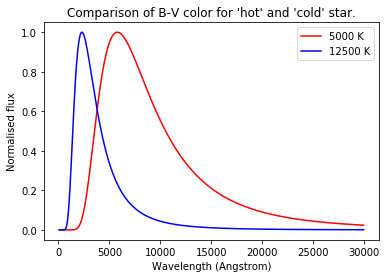

In [34]:
import numpy as np
import matplotlib.pyplot as plt
def energy(l,t):     ## function to calculate radiated power of black body using Planck's law.
    l=l*(10**(-10))
    h = 6.626*(10**(-34))
    k = 1.381*(10**(-23))
    c = 2.998*(10**8)
    a=(h*c)/(l*k*t)
    m=np.exp(a)
    f=(2*3.14*(c**2)*h)/((l**5)*(m-1))
    return f
x = np.arange(100,30000,50)
ya1 = energy(x,5000)  ## flux for range of wavelengths at 5000K
y1 = ya1/np.max(ya1)  ## normalised flux for range of wavelengths at 5000K
ya2 = energy(x,12500) ## flux for range of wavelengths at 12500K
y2 = ya2/np.max(ya2)  ## normalised flux for range of wavelengths at 12500K
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Normalised flux')
plt.title("Comparison of B-V color for 'hot' and 'cold' star.")
plt.plot(x, y1,color='red',label='5000 K')
plt.plot(x, y2,color='blue',label='12500 K')
plt.legend()
plt.show() 

The blue curve represents the 12,500 K star and red curve is 5000 K star.

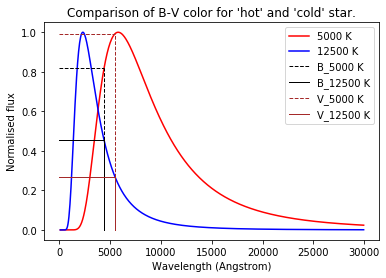

In [30]:
p1= energy(4400,5000)/(np.max(ya1)) ## reresents energy at B-band for 5000K.
p2=energy(4400,12500)/(np.max(ya2)) ## reresents energy at B-band for 12500K.
p3= energy(5500,5000)/(np.max(ya1)) ## reresents energy at V-band for 5000K.
p4=energy(5500,12500)/(np.max(ya2)) ## reresents energy at V-band for 12500K.
x2= [4400,4400]
y_r1= [0,p1] 
y_b1= [0,p2]
y_rf1= [p1,p1] ## Normalised flux for B-band for 5000K. 
y_bf1= [p2,p2] ## Normalised flux for B-band for 12500K. 
x3= [0,4400]
x4=[5500,5500]
y_r2= [0,p3]
y_b2= [0,p4]
y_rf2= [p3,p3] ## Normalised flux for V-band for 5000K. 
y_bf2= [p4,p4] ## Normalised flux for V-band for 12500K. 
x5=[0,5500]
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Normalised flux')
plt.title("Comparison of B-V color for 'hot' and 'cold' star.")
plt.plot(x, y1,color='red',label='5000 K')
plt.plot(x, y2,color='blue',label='12500 K')
plt.plot(x2, y_r1,linewidth=1,color='black',linestyle='--',label='B_5000 K')
plt.plot(x3, y_rf1,linewidth=1,color='black',linestyle='--',)
plt.plot(x2, y_b1,linewidth=1,color='black',label='B_12500 K')
plt.plot(x3, y_bf1,linewidth=1,color='black')
plt.plot(x4, y_r2,linewidth=1,color='brown',linestyle='--',label='V_5000 K')
plt.plot(x5, y_rf2,linewidth=1,color='brown',linestyle='--',)
plt.plot(x4, y_b2,linewidth=1,color='brown',label='V_12500 K')
plt.plot(x5, y_bf2,linewidth=1,color='brown')
plt.legend()
plt.show() 

Blue curve emits more energy in the B waveband than in the V waveband. This means that it is brighter in B than in V, therefore its apparent magnitude B will be lower than apparent magnitude V. The colour Index is
B – V, so for this star it will be < 0, that is, negative. The red curve represents the
5000 K star. For this B-V is positive.

### Exercise 4: Create several blackbody energy distribution curves for 9 different temperatures ranging from 3000K to 20000K (do not forget the curve that corresponds to T=9790 K, Vega’s effective temperature). Taking into account the effective wavelengths for the various filters given bellow, annotate the flux values for each filter and each curve and create a (B-V)-temperature plot. What do you observe? Which end of the line in your graph corresponds to hotter stars? Which corresponds to cooler stars? How do you know? Calculate the temperature of Spica and Antares and compare the values that you get with those found in precise measurements. Why are your values of the temperature lower than the real ones? In other words, why are they redder than they should be?

In terms of flux,

B-V = (-2.5)*(np.log10((Fb x Fv_vega)/(Fv x Fb_vega)))

If we calculate the B-V colour index for each curve and represent the blackbody
temperature as a function of the colour you should get a plot like this:


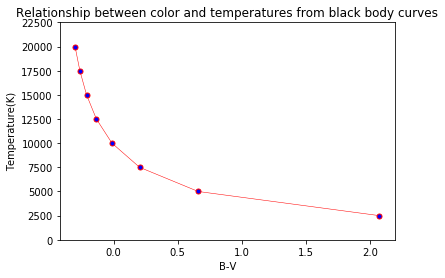

In [35]:
import numpy as np
import matplotlib.pyplot as plt
def energy(l,t):        ## function to calculate radiated power of black body using Planck's law.
    l=l*(10**(-10))
    h = 6.626*(10**(-34))
    k = 1.381*(10**(-23))
    c = 2.998*(10**8)
    a=(h*c)/(l*k*t)
    m=np.exp(a)
    f=(2*3.14*(c**2)*h)/((l**5)*(m-1))
    return f
x=np.arange(2500,22500,2500)
Fb=energy(4400,x)
Fv=energy(5500,x)
Fv_vega=energy(5500,9790)   ## flux for B-band at Vega’s effective temperature.
Fb_vega=energy(4400,9790)   ## flux for V-band at Vega’s effective temperature.
e=(Fb*Fv_vega)/(Fv*Fb_vega)
b= (-2.5)*(np.log10(e))
plt.plot(b,x,marker='o', color='red',linewidth=0.5,markerfacecolor='blue', markersize=5)
plt.xlabel("B-V")
plt.ylabel("Temperature(K)")
plt.title("Relationship between color and temperatures from black body curves")
plt.ylim(0,22500)
plt.show() 

We observe that as the B-V of stars increases, more its temperature decreases and more cooler it becomes.
The left side of graph represents the hotter stars, which have actually low B-V, 
and the right side represents the hotter stars, which have high B-V,  Since we saw that the above graph of relationship between color and temperatures from black body curves comes out to be inversely proportional.

Spica has (B-V)=-0.13 and Antares (B-V)=1.83.We can deduce approximately the temperatures: 3000 K for Antares and 12300 K for Spica. The real temperatures of Antares and Spica are 3400 K and 18000 K, respectively.


The main reason for the discrepancy in the temperature is that only the peak wavelength has been used to derive the B and V magnitudes, without taking into account the transmission curves of each filter.

Another reason why we obtain lower temperatures is that the Interstellar space is
not a perfect vacuum. The interstellar medium (ISM) comprises cold neutral gas (H I
at ≈ 70 K), warm neutral gas (H I at 6,000 K) and hot ionised plasma (H II at 106
K)
primarily located in the plane of the galaxy in the spiral arms. Cosmic dust is made
up of small grains of silicates, iron, carbon, frozen water and ammonia ice 0.1 to 0.01
microns (μm) in size. Although this cosmic dust only makes up 1% of the mass of the
ISM, it absorbs and scatters light from stars. This means that light from a distant star
is reduced in intensity so that the star appears dimmer than it would be if there was
no intervening material.

### Exercise 5: Using the blackbody curves obtained in the previous exercise, annotate the wavelength at which the flux is maximum. What do you observe? Create a plot of temperature as a function of the λpeak using a logaritmic scale. What do you observe? Fit a function (straight line) to the data and calculate Wien’s constant. The Sun has a peak wavelength of thermal radiation of 5300 Å. What is the Sun's average temperature? And for the Polar star which has λpeak=3500 Å.

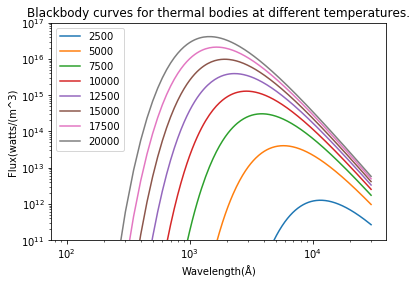

In [40]:
import numpy as np
import matplotlib.pyplot as plt
def energy(l,t):
    l=l*(10**(-10))
    h = 6.626*(10**(-34))
    k = 1.381*(10**(-23))
    c = 2.998*(10**8)
    a=(h*c)/(l*k*t)
    m=np.exp(a)
    f=(2*3.14*(c**2)*h)/((l**5)*(m-1))
    return f
x = np.arange(100,30000,50)

t = range(2500,22500,2500)

for i in t:
    y=energy(x,i)
    plt.plot(x, y,label=i)
plt.xscale('log')
plt.ylim([10**11,10**17])
plt.yscale('log')
plt.ylabel("Flux(watts/(m^3)")
plt.xlabel("Wavelength(Å)")
plt.title("Blackbody curves for thermal bodies at different temperatures.")
plt.legend()
plt.show()  

Thermal radiation is emitted by stars. The curves show that
hotter stars give off more thermal radiation. The curves also show that the peak
wavelength of the thermal radiation moves to shorter wavelengths as the
temperature increases.

###### Temperature and Peak Wavelength (Wien’s law): 
Wien's Law tells us that objects of different temperature emit spectra that peak at different wavelengths.

Hotter objects emit most of their radiation at shorter wavelengthsamd  hence
they will appear to be bluer.Cooler objects emit most of their radiation at longer wavelengths and hence
they will appear to be redder.
Furthermore, at any wavelength, a hotter object radiates more (is more luminous)
than a cooler one. We can understand this by the size of the area that encloses each
curve.

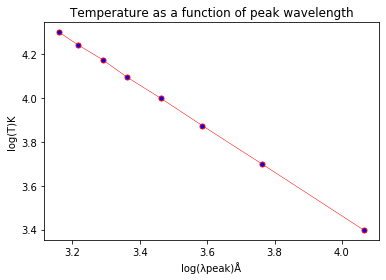

In [42]:
import numpy as np
import matplotlib.pyplot as plt
def energy(l,t):
    l=l*(10**(-10))
    h = 6.626*(10**(-34))
    k = 1.381*(10**(-23))
    c = 2.998*(10**8)
    a=(h*c)/(l*k*t)
    m=np.exp(a)
    f=(2*3.14*(c**2)*h)/((l**5)*(m-1))
    return f
x = np.arange(100,30000,50)

t = range(2500,22500,2500)
k=[]
for i in t:
    y=energy(x,i)
    ya=np.max(y)
    for j in x:
        yt=energy(j,i)
        if yt==ya:
            k.append(j)
tl=np.log10(t)
xp=np.log10(k)
plt.plot(xp,tl,color='red',marker='o',linewidth=0.5,markerfacecolor='blue', markersize=5)
plt.xlabel("log(λpeak)Å")
plt.ylabel("log(T)K")
plt.title("Temperature as a function of peak wavelength")
plt.show()

The best-fit is

Log(T K) = 7.4574 - 0.9986 log ( λpeak (Å))


thus,
λpeak T = 107.4574 = 28668171.9 Å K


The Wien’s constant in units of the International System that we find from our data
is
2.867 x (10^(-3))m K  which can be compared with the carefully measured relationship between
temperature and peak wavelength of thermal radiation.

λpeak T = 2.897 x (10^(-3)) m K,
where λpeak is measured in meters and T is measured in Kelvin.


..The Sun's peak wavelength is 5300 Angstroms.

    Convert this length to meters:
    1 meter = 1010 Angstroms
    5300 Angstroms (1 m/ 1010 Angstroms) = 5.3 x (10^(-7)) m.
    Insert this length into the peak wavelength equation:
    λpeak T = 2.897 x (10^(-3)) m K.
    to get T : (5.3 x (10^(-7)) m) T = 2.897 x (10^(-3)) m K.
    Now, solve for T: 
    T = (2.897 x (10^(-3)) m K) / (5.3 x (10^(-7)) m) = 5460 K
    Thus, Sun's average temperature is 5460 K.

..The Polar star's peak wavelength is 3500 Angstroms.

    Convert this length to meters:
    1 meter = 1010 Angstroms
    3500 Angstroms (1 m/ 1010 Angstroms) = 3.5 x (10^(-7)) m.
    Insert this length into the peak wavelength equation:
    λpeak T = 2.897 x (10^(-3)) m K.
    to get T : (3.5 x (10^(-7)) m) T = 2.897 x (10^(-3)) m K.
    Now, solve for T: 
    T = (2.897 x (10^(-3)) m K) / (3.5 x (10^(-7)) m) = 8534 K
    Thus, Polar star's average temperature is 8534 K.